In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import re
import datetime
import csv
#from sklearn import datasets
from scipy.stats import linregress
%matplotlib notebook

In [5]:
# Reference the file where the CSV is located
it_data= "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
it_data_df.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [6]:
# Print one job description to ensure that the text is showing a job posting.
print(it_data_df['job_description'][1])

We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using Python, SQL, Python libraries, Machine Learning Algorithms ( i.e. Decision Tree, Random Forest, Logistic Regression, etc.) should have strong Python skills. Additional experience with R Cloud would be a plus. Will be working with structured and unstructured data formats so any experience with Hive, and other Big Data technologies would be a plus. Should have strong communication skills and the ability to explain data findings to both Technical and Non- Technical audiences. We are NOT considering Recent College Grads- MUST have a minimum of 2-3 post Graduate experience working in a

In [7]:
# Identify if each job description contains the keyword string "Python" (a highly sought after programming language!)
p = 'Python'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Python"] = True
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True


In [8]:
# Count the amount value counts (vcs) for the newly created "Python" column
# This will indicate how many of the job descriptions included "Python" in their posting
# Note: casting it to a float so that it can easily be incorporated into a bar plot later
python_vcs = float(it_data_df['Python'].value_counts())
python_vcs

7803.0

In [9]:
# Identify if each job description contains the keyword string "Excel" (short for "Microsoft Excel")
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Excel"] = True
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN


In [10]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
excel_vcs = float(it_data_df['Excel'].value_counts())
excel_vcs

2919.0

In [11]:
# Identify if each job description contains the keyword string "SQL"
p = 'SQL'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'SQL'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,Excel,SQL
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,True


In [12]:
# Count the amount value counts (vcs) for the newly created "SQL" column
# This will indicate how many of the job descriptions included "SQL" in their posting
sql_vcs = float(it_data_df['SQL'].value_counts())
sql_vcs

5743.0

In [13]:
# Identify if each job description contains the keyword string "Java" (another common programming language)
p = 'Java'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Java'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,Excel,SQL,Java
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,True,NaN


In [14]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
java_vcs = float(it_data_df['Java'].value_counts())
java_vcs

2390.0

In [15]:
# Identify if each job description contains the keyword string "Machine Learning" (another highly sought-out skill!)
p = 'Machine Learning'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Machine Learning'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,Excel,SQL,Java,Machine Learning
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,True,NaN,NaN


In [16]:
# Count the amount value counts (vcs) for the newly created "Machine Learning" column
# This will indicate how many of the job descriptions included "Machine Learning" in their posting
ml_vcs = float(it_data_df['Machine Learning'].value_counts())
ml_vcs

2534.0

In [17]:
# Identify if each job description contains the keyword string "Tableau"
p = 'Tableau'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df.head(1)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_email,contact_phone_number,uniq_id,html_job_description,Python,Excel,SQL,Java,Machine Learning,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,True,NaN,NaN,True


In [18]:
# Count the amount value counts (vcs) for the newly created "Tableau" column
# This will indicate how many of the job descriptions included "Tableau" in their posting
tableau_vcs = float(it_data_df['Tableau'].value_counts())
tableau_vcs

2141.0

<IPython.core.display.Javascript object>


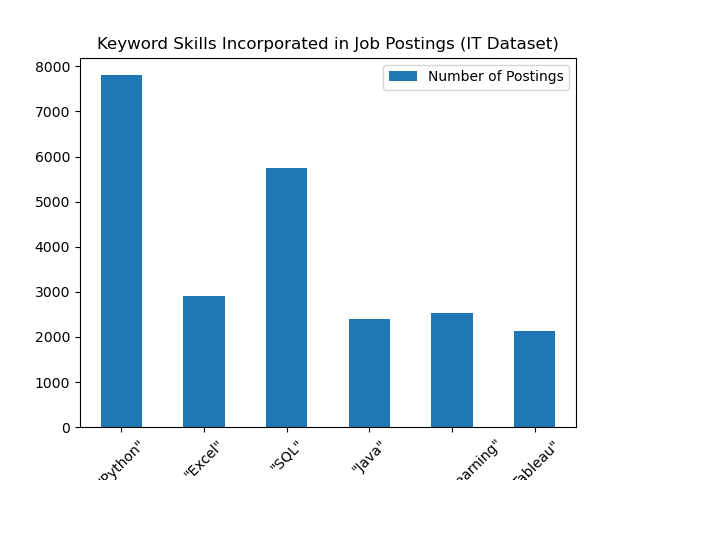

AttributeError: 'NoneType' object has no attribute '_send_event'

In [20]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[python_vcs, excel_vcs, sql_vcs, java_vcs, ml_vcs, tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45)
plt.title("Keyword Skills Incorporated in Job Postings (IT Dataset)")
plt.show
plt.savefig("IT_Data__Bars", bbox_inches='tight')

In [21]:
## Do the same analysis for a different data set to compare the results

# Reference the file where the CSV is located
indeed_data = "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_df = pd.read_csv(indeed_data)
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0


In [22]:
# Note that this dataset incorporates a "Skill" column, with keywords job skills, often programming languages, already highlighted
# Identify if each "Skill" column contains the keyword string "Python" in this data set
p = 'Python'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Python"] = True
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,1,0,0,0,1,0,0,NaN


In [23]:
# Count the amount value counts (vcs) for the newly created "Python" column
# This will indicate how many of the job descriptions included "Python" in their posting
indeed_python_vcs = float(indeed_df['Python'].value_counts())
indeed_python_vcs

3325.0

In [24]:
# Identify if each "Skill" column contains the keyword string "Excel", short for "Microsoft Excel"
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Excel"] = True
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,1,0,0,0,1,0,0,NaN,NaN


In [25]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
indeed_excel_vcs = float(it_data_df['Excel'].value_counts())
indeed_excel_vcs

2919.0

In [26]:
# Identify if each "Skill" column contains the keyword string "SQL"
p = 'SQL'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"SQL"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,1,0,0,0,1,0,0,NaN,NaN,True


In [27]:
# Count the amount value counts (vcs) for the newly created "SQL" column
# This will indicate how many of the job descriptions included "SQL" in their posting
indeed_sql_vcs = float(it_data_df['SQL'].value_counts())
indeed_sql_vcs

5743.0

In [28]:
# Identify if each "Skill" column contains the keyword string "Java"
p = 'Java'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Java"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,NaN,NaN,True,NaN


In [29]:
# Identify if each "Skill" column contains the keyword string "Java"
p = 'Java'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Java"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,NaN,NaN,True,NaN


In [30]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_java_vcs = float(it_data_df['Java'].value_counts())
indeed_java_vcs

2390.0

In [31]:
# Identify if each "Skill" column contains the keyword string "Machine Learning" in this data set
p = 'Machine Learning'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Machine Learning"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java,Machine Learning
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,1,0,0,NaN,NaN,True,NaN,NaN


In [32]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_ml_vcs = float(it_data_df['Machine Learning'].value_counts())
indeed_ml_vcs

2534.0

In [33]:
# Identify if each "Skill" column contains the keyword string "Tableau" in this data set
p = 'Tableau'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(1)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java,Machine Learning,Tableau
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,1,0,0,NaN,NaN,True,NaN,NaN,NaN


In [34]:
# Count the amount value counts (vcs) for the newly created "Tableau" column
# This will indicate how many of the job descriptions included "Tableau" in their posting
indeed_tableau_vcs = float(it_data_df['Tableau'].value_counts())
indeed_tableau_vcs

2141.0

In [39]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[indeed_python_vcs, indeed_excel_vcs, indeed_sql_vcs, indeed_java_vcs, 
                                         indeed_ml_vcs, indeed_tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45, color="lightcoral")
plt.title("Keyword Skills Incorporated in Job Postings (Indeed Dataset)")
plt.show
plt.savefig("INDEED_Data__Bars.png", bbox_inches='tight')

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute '_send_event'

In [40]:
# Construct a histogram from the available salary data in the Indeed dataset to see probable salary estimates as available from the Indeed data set.
plt.hist(indeed_df['Queried_Salary'], align="left")
plt.title("Queried Salaries")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.xlabel('Salaries in USD')
plt.ylabel('Number of Job Postings')
indeed_df['Queried_Salary']
plt.savefig("Salary_Bars.png", bbox_inches='tight')
plt.show()

AttributeError: 'NoneType' object has no attribute '_send_event'

In [3]:
# create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(50)

# clean up data frame for more consistent text entries


,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-09-29 00:43:50 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916869827785,NaN,NaN,d2285b6e99067fb246c0f674995dad7d,<h2>About this job</h2>\r\n<p><span>Job type: ...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [4]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())

In [42]:
# Job openings by posting date:
    # Line graph that illustrates the consistency of 
    # Data Science job listings over (approximately)
    # the last year. Outlier data was removed to provide
    # a more accurate view of the availability of jobs. 
    # The data set terminated prior to the end of 2019,
    # so all months were not available.

# Dropping rows with missing data
by_date = it_data_df[['post_date']].dropna(how='any')

# Creating a new column for a new date format
by_date['month'] = pd.to_datetime(by_date['post_date'])

# Changes each date to a year/month format for simplified, easy-to-read graph
by_date['month'] = by_date['month'].apply(lambda x: x.strftime('%m'))

#ordered_openings_by_date = openings_by_date.sort_values('Job_Posting_Date', ascending=True)
openings_by_date = by_date['month'].value_counts().rename_axis('Job_Posting_Date').reset_index(name = 'Count')
openings_by_date = openings_by_date.sort_values('Job_Posting_Date',ascending=True)

# Create and show chart
plt.plot(openings_by_date['Job_Posting_Date'], openings_by_date['Count'])
plt.title('Job Opportunites Over Time (Feb - Sept 2019)')
plt.xlabel('Month')
plt.ylabel('Number of Opportunities')
plt.show()

# Save chart
plt.savefig('JobsOverTimeLineGraph.png')

AttributeError: 'NoneType' object has no attribute '_send_event'

<IPython.core.display.Javascript object>


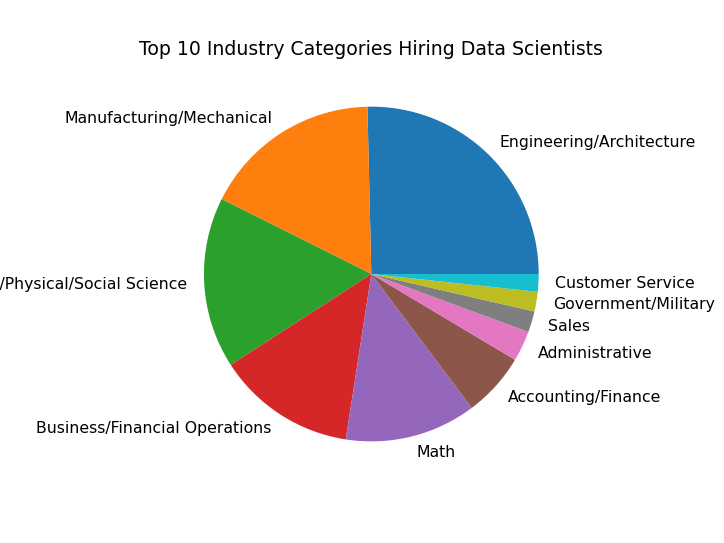

In [8]:
# Most openings by category:
    # Sorts the category column and creates a bar graph to 
    # highlight the 10 industry categories with the highest
    # number of job opportunities for data scientists.

# Drop rows with missing data
by_category = it_data_df[['category']].dropna(how='any')

# Combining redundant categories
by_category['category'] = by_category['category'].replace('Engineering-or-architecture', 'Engineering/Architecture')
by_category['category'] = by_category['category'].replace('architecture and engineering', 'Engineering/Architecture')
by_category['category'] = by_category['category'].replace('Accounting-or-finance', 'Accounting/Finance')
by_category['category'] = by_category['category'].replace('Manufacturing-or-mechanical', 'Manufacturing/Mechanical')

# Cleaning up/standardizing category names for a more cohesive and nicer-looking graph
by_category['category'] = by_category['category'].replace('math jobs', 'Math')
by_category['category'] = by_category['category'].replace('Government-or-military', 'Government/Military')
by_category['category'] = by_category['category'].replace('Customer-Service', 'Customer Service')
by_category['category'] = by_category['category'].replace('business and financial operations', 'Business/Financial Operations')
by_category['category'] = by_category['category'].replace('life physical and social science', 'Life/Physical/Social Science')

openings_by_category_name = by_category['category'].value_counts().rename_axis('Category').reset_index(name = 'Count')
openings_by_category_name.sort_values('Count',ascending=False)

# Filtering out ambiguous/less helpful categories
filtered_data_frame = openings_by_category_name[~openings_by_category_name['Category'].str.contains('computer jobs')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Computer-or-internet')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Computer/Internet')]
filtered_data_frame = filtered_data_frame[~filtered_data_frame['Category'].str.contains('Data Scientist')]

# Displaying/formatting graph
top_10_categories = filtered_data_frame.sort_values('Count', ascending=False).head(10)

plt.pie(top_10_categories['Count'],labels = top_10_categories['Category'])
plt.title("Top 10 Industry Categories Hiring Data Scientists")

plt.show()

# Save chart
plt.savefig('CategoryPie.png')

<IPython.core.display.Javascript object>


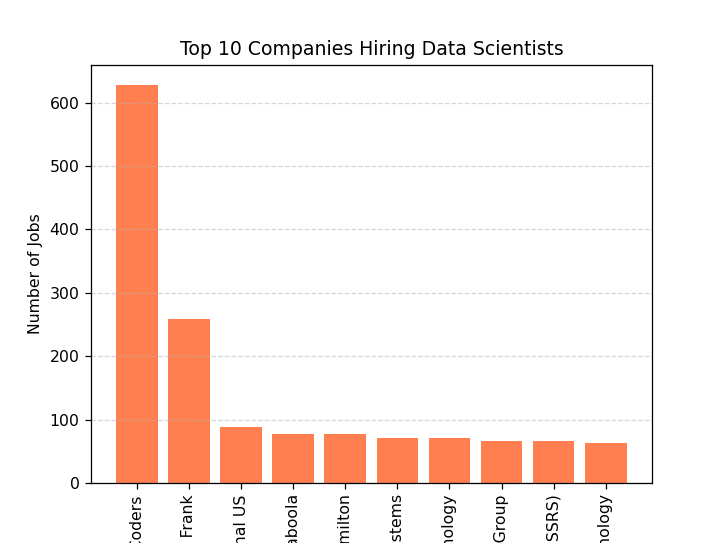

In [9]:
# Most openings by company:
    # Sorts the company_name column and creates a bar graph to 
    # highlight the 10 companies with the highest number of job
    # opportunities for data scientists.

# Dropping rows that are missing data
by_company_name = it_data_df[['company_name']].dropna(how='any')

# Graph content
openings_by_company_name = by_company_name['company_name'].value_counts().rename_axis('Company').reset_index(name = 'Count')
openings_by_company_name.sort_values('Count',ascending=False)

top_10_companies = openings_by_company_name.sort_values('Count', ascending=False).head(10)

# Graph creation and formatting
plt.bar(top_10_companies['Company'],top_10_companies['Count'], color = 'coral')
plt.xticks(rotation = 90)
plt.grid(linestyle = '--', axis = 'y', alpha = 0.5)
plt.title('Top 10 Companies Hiring Data Scientists')
plt.xlabel('Company Name')
plt.ylabel('Number of Jobs')

plt.show()

# Save chart
plt.savefig('CompaniesBar.png')